# Emission Ratio Diagnostics for Hydrodynamic Simulations

In [1]:
import os
import sys

import ChiantiPy.core as ch
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
%matplotlib inline

 found PyQt4 widgets
 using CLI for selections
 reading chiantirc file
 your version of Python does not support multiprocessing 
 you will not be able to use mspectrum


In [Brosius et al. (2014)](http://adsabs.harvard.edu/abs/2014ApJ...790..112B), the authors diagnose the existence of hot plasma thought to be created by impulsive heating (i.e. "nanoflares") by computing the intensity ratio between Fe XIX ($T\approx8.9$ MK) and Fe XII ($T\approx1.6$ MK).

| Ion | Wavelength ($\mathrm{\mathring{A}}$) | Peak Temperature (MK) |
|:----:|:------------------:|:---------------------:|
| Fe XII | 592.6 | 1.6 |
| Fe XIX | 592.2 | 8.9 |

We'd like to look at a few different line pairs to see how this ratio changes when we move the "hot" and "cool" temperatures up and down the emission measure distribution. We'll look at four in total. The peak temperatures come from the [most current Chianti line lists](http://www.chiantidatabase.org/chianti_linelist.html).

| Ion | Wavelength ($\mathrm{\mathring{A}}$) | $\log(T_{peak})$ |
|:---:|:------------------------------------:|:---------------:|
| Fe XII | 592.6 | None listed |
| Fe XV | 284.163 | 6.4 |
| Fe XIX | 592.2 | 7.0 |
| Fe XX | 12.8454 | 7.1 |

### Contribution Functions, $G(T,\lambda)$
Let's check that these peak temperatures are consistent with where $G(T)$ is peaked. First setup the temperature range and we'll calculate all of these at constant density, assuming that $G(T)$ is only weakly dependent on the density.

In [2]:
temperature=np.logspace(6,7.5,200)
eDensity=1.e+9

In [3]:
fe12=ch.ion('fe_12',temperature=np.logspace(6,6.3,100),eDensity=eDensity)
fe15=ch.ion('fe_15',temperature=np.logspace(6.2,6.5,100),eDensity=eDensity)
fe19=ch.ion('fe_19',temperature=np.logspace(6.7,7.0,100),eDensity=eDensity)
fe20=ch.ion('fe_20',temperature=np.logspace(6.9,7.2,100),eDensity=eDensity)

First, the two lines used in Brosius et al. (2014).

 ndens =     1 ntemp =   100
 - make a selection from these - 
     0     592.6000    6   17 3s 3p4 4P2.5 - 3s2 3p2 3d 4F4.5 
     1     592.6940  394  545 3s2 3p2 4p 2P1.5 - 3s2 3p2 4d 2F2.5 
     2     592.9640  656  896 3s 3p3 4p 4D2.5 - 3s 3p3 4d 2P1.5 
 type the comma-separated index/indices of your selection
>>> '0'


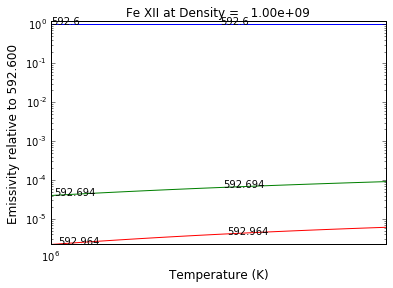

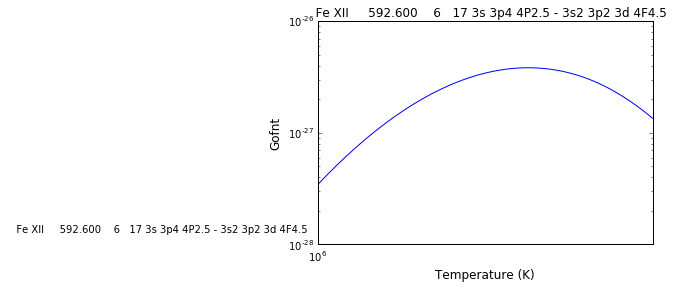

In [4]:
fe12.gofnt(wvlRange=[592,593],top=3)

 ndens =     1 ntemp =   100
 - make a selection from these - 
     0     592.2350    1    4 2s22p4 3P2.0 - 2s22p4 1D2.0 
 type the comma-separated index/indices of your selection
>>> '0'


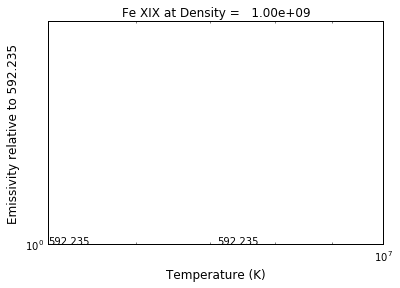

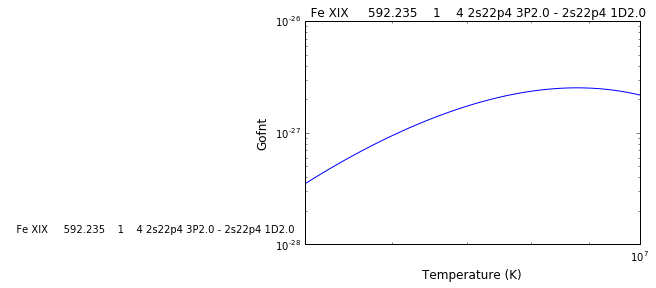

In [5]:
fe19.gofnt(wvlRange=[592,593],top=3)

We can easily find at what temperature the contribution functions for these two ions peak at.

In [6]:
peak_temp = fe12.Gofnt['temperature'][np.argmax(fe12.Gofnt['gofnt'])]
print('Fe XII has a peak temperature of {} MK or logT= {}'.format(peak_temp/1e+6,np.log10(peak_temp)))
peak_temp = fe19.Gofnt['temperature'][np.argmax(fe19.Gofnt['gofnt'])]
print('Fe XIX has a peak temperature of {} MK or logT= {}'.format(peak_temp/1e+6,np.log10(peak_temp)))

Fe XII has a peak temperature of 1.54127022251 MK or logT= 6.18787878788
Fe XIX has a peak temperature of 8.75838924485 MK or logT= 6.94242424242


Similarly, for the remaining two ions,

 ndens =     1 ntemp =   100
 - make a selection from these - 
     0     284.1330   62   94 3p.4p 1D2.0 - 3d.4p 1D2.0 
     1     284.1630    1    5 3s2 1S0.0 - 3s.3p 1P1.0 
     2     284.7470   41   63 3s.4p 1P1.0 - 3p.4p 1S0.0 
 type the comma-separated index/indices of your selection
>>> '1'
 ndens =     1 ntemp =   100
 - make a selection from these - 
     0      12.8120    1   60 2s2.2p3 4S1.5 - 2s2.2p2(3P).3d 4P0.5 
     1      12.8270    1   58 2s2.2p3 4S1.5 - 2s2.2p2(3P).3d 4P1.5 
     2      12.8454    1   56 2s2.2p3 4S1.5 - 2s2.2p2(3P).3d 4P2.5 
 type the comma-separated index/indices of your selection
>>> '2'
Fe XV has a peak temperature of 2.2000079106 MK or logT= 6.34242424242
Fe XX has a peak temperature of 10.6481148623 MK or logT= 7.02727272727


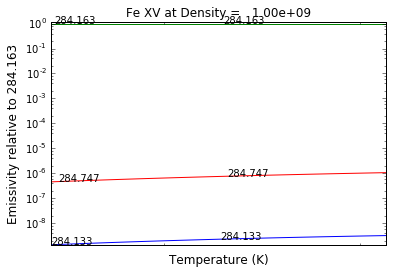

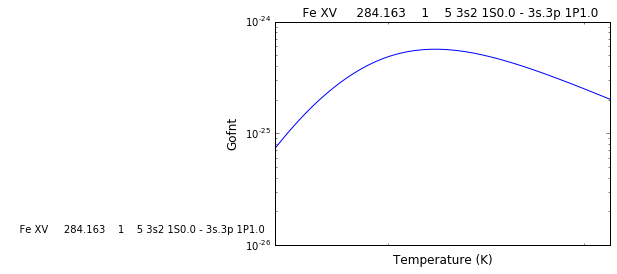

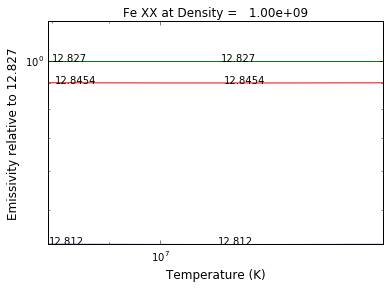

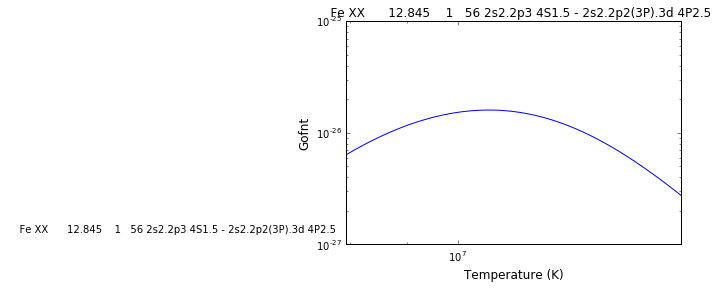

In [7]:
fe15.gofnt(wvlRange=[283,285],top=3)
fe20.gofnt(wvlRange=[10,13],top=3)
peak_temp = fe15.Gofnt['temperature'][np.argmax(fe15.Gofnt['gofnt'])]
print('Fe XV has a peak temperature of {} MK or logT= {}'.format(peak_temp/1e+6,np.log10(peak_temp)))
peak_temp = fe20.Gofnt['temperature'][np.argmax(fe20.Gofnt['gofnt'])]
print('Fe XX has a peak temperature of {} MK or logT= {}'.format(peak_temp/1e+6,np.log10(peak_temp)))

## Revised Peak Temperatures
The results from our analysis using the contribution function $G(T)$ for each transition are,

| Ion | Transition ($\mathrm{\mathring{A}}$) | $\log({T_{peak}})$ | $T_{peak}$ (MK) |
|:-----:|:-----:|:-----:|:-----:|
| Fe XII | 592.6 | 6.187 | 1.54 |
| Fe XV | 284.163 | 6.342 | 2.20 |
| Fe XIX | 592.2 | 6.942 | 8.76 |
| Fe XX | 12.8454 | 7.027 | 10.65 |

It's unclear how to justify these results with those of Brosius et al. (2014) or the CHIANTI line lists. It could be that here we are using CHIANTI v8 whereas these other references are using v7 or earlier.